In [1]:
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_teddynote.messages import stream_response

import time

# Ollama 모델을 불러옵니다.
llm = ChatOllama(model="gemma3:12b")

# 프롬프트
prompt = ChatPromptTemplate.from_template("{topic} 에 대하여 간략히 설명해 줘.")

# 질의 내용
summarize_prompt = f"""
다음은 한 매장의 최근 운영 데이터를 요약한 내용입니다.
아래 [데이터]를 기반으로 매장의 현재 상황을 분석하고, 문제가 있다면 그 원인을 추론해 주세요.
또한 아래 [요청사항]을 기반으로 매장의 개선을 위한 구체적인 전략도 제안해 주세요.

[데이터]

일평균 방문 고객 수: 320명 → 최근 일주일간 270명으로 감소

평균 고객 체류 시간: 25분

점심 시간(12시~2시) 매출: 일 평균 대비 35% 감소

최근 한 달간 리뷰 평점: 4.5점 → 3.8점

직원 2명 퇴사 → 대체 인력 미배치


[요청사항]

위 데이터를 기반으로 매장의 현재 상황을 진단해 주세요.

어떤 문제가 발생하고 있는지, 그 원인이 무엇인지 추론해 주세요.

이를 개선하기 위한 실행 전략을 제안해 주세요.
"""

start_time = time.time()

# response = llm.invoke(prompt)
response = llm.stream(summarize_prompt)
stream_response(response)

end_time = time.time()

passed_time = end_time - start_time
print(passed_time)

/tmp/ipykernel_11830/4064318055.py:9: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm = ChatOllama(model="gemma3:12b")


## 매장 상황 분석 및 개선 전략

**1. 현재 상황 진단:**

매장은 현재 심각한 어려움을 겪고 있습니다. 핵심 지표들의 악화는 단순히 일시적인 현상이 아닌, 근본적인 문제 발생을 시사합니다.

*   **고객 감소:** 일평균 방문 고객 수 감소는 매출 감소로 직결되며, 매장의 활력을 저하시킵니다.
*   **매출 감소:** 특히 점심시간 매출 감소는 핵심 고객층의 이탈을 의미하며, 전체적인 수익성에 부정적인 영향을 미칩니다.
*   **리뷰 평점 하락:** 리뷰 평점 하락은 고객 만족도 저하를 보여주며, 이는 매장의 이미지 손상으로 이어질 수 있습니다.
*   **직원 이탈 및 인력 부족:** 직원 퇴사는 서비스 품질 저하의 직접적인 원인이 되며, 업무 부담 증가로 이어져 직원들의 사기를 더욱 저하시킵니다.

**2. 문제 발생 원인 추론:**

위의 상황들을 종합적으로 고려했을 때, 다음과 같은 원인들이 복합적으로 작용한 것으로 추론됩니다.

*   **인력 부족으로 인한 서비스 품질 저하:** 직원 2명의 퇴사와 대체 인력 미배치로 인해 직원들의 업무 부담이 가중되었고, 이는 서비스 품질 저하로 이어졌을 가능성이 높습니다. 고객 응대 시간 증가, 메뉴 준비 지연, 테이블 정리 미흡 등 다양한 문제들이 발생했을 수 있습니다.
*   **고객 불만 및 부정적 경험 확산:** 서비스 품질 저하로 인해 고객들이 부정적인 경험을 했을 가능성이 높으며, 이러한 경험은 온라인 리뷰 등을 통해 확산되면서 다른 잠재 고객의 방문을 꺼리게 만들었을 수 있습니다.
*   **점심 시간 집중 고객 감소:** 점심시간은 짧은 시간 안에 많은 고객을 유치해야 하는 시간입니다. 인력 부족으로 인해 메뉴 준비가 늦어지거나, 대기 시간이 길어지면서 점심시간에 방문하는 고객들이 불편을 느껴 다른 곳으로 옮겨갔을 가능성이 높습니다.
*   **기타 외부 요인:** 경쟁 매장 증가, 계절적 요인, 주변 환경 변화 등 외부적인 요인 또한 영향을 미쳤을 수 있습니다. (데이터만으로는 

In [ ]:
# 1-2. LLM 모델이 이전 대화를 기억하도록 하기

from langchain_teddynote.messages import stream_response
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory
from langchain.chat_models import ChatOpenAI

# 메모리 생성 (기록 저장용)
memory = ConversationBufferMemory(memory_key="chat_history", input_key="user_query")

# 질의 내용
pinky_prompt = """
당신은 레스토랑을 돌아다니는 '핑키'라는 이름을 가진 모바일 로봇입니다.
지금까지의 대화는 다음과 같습니다 : {chat_history}

당신의 임무는 레스토랑 오너의 {user_query}에 대해 {chat_history}를 기반으로 친절하고 진실되게 답변하는 것입니다.
또한 당신은 {user_query}에 대해 2~3줄 이내로 짧고 간결하게 답변하여야 합니다.
"""

pinky_template = PromptTemplate(template = pinky_prompt, input_variables=["chat_history", "user_query"])

# Ollama 모델을 불러옵니다.
llm = ChatOllama(model="gemma3:12b")

chain = LLMChain(
    llm=llm,
    prompt=pinky_template,
    memory=memory,
    verbose=True
)


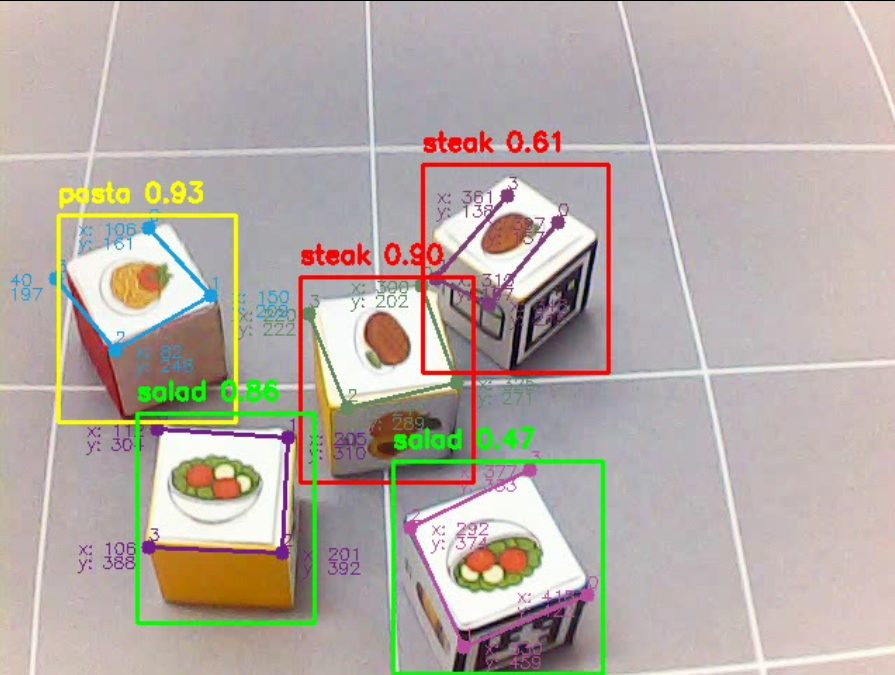

네, 스테이크 있어요! 붉은 상자에 그려진 스테이크를 보여드릴게요. 맛있게 드실 수 있도록 준비해 드릴게요! 😊0.019084692001342773


In [3]:
# 1-4. GPT-4o 멀티모달의 구축

from langchain_teddynote.messages import stream_response
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.memory import ConversationBufferMemory
from langchain.chat_models import ChatOpenAI
from langchain_teddynote.models import MultiModal
from langchain_community.chat_models import ChatOllama

import time

# 메모리 생성 (기록 저장용)
memory = ConversationBufferMemory(memory_key="chat_history", input_key="user_query")

# 질의 내용
multimodal_system_prompt = """
당신은 레스토랑을 돌아다니는 '핑키'라는 이름을 가진 모바일 로봇입니다.
당신의 임무는 레스토랑 오너의 질문에 대해 친절하고 상냥하게 답변하는 것입니다.
당신은 박스 안에 그려진 객체에 대해서 레스토랑 오너의 질문에 '해요체'로 답변하여야 합니다.
"""

user_prompt = """
스테이크가 있어?
"""

# Ollama 모델을 불러옵니다.
llm = ChatOllama(model="gemma3:12b")

multimodal_llm = MultiModal(llm, system_prompt=multimodal_system_prompt, user_prompt=user_prompt)

image_path = '/home/addinedu/roscamp-repo-2/cook_gpt/cookgpt_service/LLM_ws/test_image/Screenshot from 2025-04-21 15-37-21.png'

start_time = time.time()

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(image_path)

end_time = time.time()
passed_time = end_time - start_time

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

print(passed_time)